# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial" 

#"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
   # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({'City': city, 
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

      
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | halayhay
City not found. Skipping...
Processing Record 2 of Set 1 | usinsk
City not found. Skipping...
Processing Record 3 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 4 of Set 1 | constantia
City not found. Skipping...
Processing Record 5 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 6 of Set 1 | la passe
City not found. Skipping...
Processing Record 7 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 8 of Set 1 | otjiwarongo
City not found. Skipping...
Processing Record 9 of Set 1 | lebu
City not found. Skipping...
Processing Record 10 of Set 1 | bilibino
City not found. Skipping...
Processing Record 11 of Set 1 | hamilton
City not found. Skipping...
Processing Record 12 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 13 of Set 1 | mount isa
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-

City not found. Skipping...
Processing Record 19 of Set 3 | mokhsogollokh
City not found. Skipping...
Processing Record 20 of Set 3 | weno
City not found. Skipping...
Processing Record 21 of Set 3 | tabas
City not found. Skipping...
Processing Record 22 of Set 3 | fort st. john
City not found. Skipping...
Processing Record 23 of Set 3 | margaret river
City not found. Skipping...
Processing Record 24 of Set 3 | valente
City not found. Skipping...
Processing Record 25 of Set 3 | pyhajarvi
City not found. Skipping...
Processing Record 26 of Set 3 | bejubang dua
City not found. Skipping...
Processing Record 27 of Set 3 | kismayo
City not found. Skipping...
Processing Record 28 of Set 3 | cartagena
City not found. Skipping...
Processing Record 29 of Set 3 | bredasdorp
City not found. Skipping...
Processing Record 30 of Set 3 | invercargill
City not found. Skipping...
Processing Record 31 of Set 3 | hafar al-batin
City not found. Skipping...
Processing Record 32 of Set 3 | kingston
City not 

City not found. Skipping...
Processing Record 37 of Set 5 | tamanrasset
City not found. Skipping...
Processing Record 38 of Set 5 | saldanha
City not found. Skipping...
Processing Record 39 of Set 5 | yulinshi
City not found. Skipping...
Processing Record 40 of Set 5 | abbadia san salvatore
City not found. Skipping...
Processing Record 41 of Set 5 | duck lake
City not found. Skipping...
Processing Record 42 of Set 5 | afonso claudio
City not found. Skipping...
Processing Record 43 of Set 5 | nema
City not found. Skipping...
Processing Record 44 of Set 5 | acarau
City not found. Skipping...
Processing Record 45 of Set 5 | canutama
City not found. Skipping...
Processing Record 46 of Set 5 | flin flon
City not found. Skipping...
Processing Record 47 of Set 5 | howard springs
City not found. Skipping...
Processing Record 48 of Set 5 | zhezqazghan
City not found. Skipping...
Processing Record 49 of Set 5 | daru
City not found. Skipping...
Processing Record 0 of Set 6 | trinidad
City not fou

City not found. Skipping...
Processing Record 5 of Set 8 | pemangkat
City not found. Skipping...
Processing Record 6 of Set 8 | nuevo baztan
City not found. Skipping...
Processing Record 7 of Set 8 | nogliki
City not found. Skipping...
Processing Record 8 of Set 8 | tianfu
City not found. Skipping...
Processing Record 9 of Set 8 | kenora
City not found. Skipping...
Processing Record 10 of Set 8 | berdigestyakh
City not found. Skipping...
Processing Record 11 of Set 8 | castillos
City not found. Skipping...
Processing Record 12 of Set 8 | codrington
City not found. Skipping...
Processing Record 13 of Set 8 | mont-dore
City not found. Skipping...
Processing Record 14 of Set 8 | dakoro
City not found. Skipping...
Processing Record 15 of Set 8 | cles
City not found. Skipping...
Processing Record 16 of Set 8 | ceeldheer
City not found. Skipping...
Processing Record 17 of Set 8 | cadale
City not found. Skipping...
Processing Record 18 of Set 8 | binghamton
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 24 of Set 10 | santiago
City not found. Skipping...
Processing Record 25 of Set 10 | college
City not found. Skipping...
Processing Record 26 of Set 10 | yuanping
City not found. Skipping...
Processing Record 27 of Set 10 | letlhakeng
City not found. Skipping...
Processing Record 28 of Set 10 | san patricio
City not found. Skipping...
Processing Record 29 of Set 10 | lethem
City not found. Skipping...
Processing Record 30 of Set 10 | sprockhovel
City not found. Skipping...
Processing Record 31 of Set 10 | egilsstadir
City not found. Skipping...
Processing Record 32 of Set 10 | saint-jean-de-monts
City not found. Skipping...
Processing Record 33 of Set 10 | pisco
City not found. Skipping...
Processing Record 34 of Set 10 | iiyama
City not found. Skipping...
Processing Record 35 of Set 10 | rikaze
City not found. Skipping...
Processing Record 36 of Set 10 | fedorovka
City not found. Skipping...
Processing Record 37 of Set 10 | huancavelica
Ci

City not found. Skipping...
Processing Record 40 of Set 12 | cedeira
City not found. Skipping...
Processing Record 41 of Set 12 | laela
City not found. Skipping...
Processing Record 42 of Set 12 | vredenburg
City not found. Skipping...
Processing Record 43 of Set 12 | nasielsk
City not found. Skipping...
Processing Record 44 of Set 12 | kupang
City not found. Skipping...
Processing Record 45 of Set 12 | labuan
City not found. Skipping...
Processing Record 46 of Set 12 | maunabo
City not found. Skipping...
Processing Record 47 of Set 12 | labrador city
City not found. Skipping...
Processing Record 48 of Set 12 | paungde
City not found. Skipping...
Processing Record 49 of Set 12 | north salt lake
City not found. Skipping...
Processing Record 0 of Set 13 | canatlan
City not found. Skipping...
Processing Record 1 of Set 13 | choyr
City not found. Skipping...
Processing Record 2 of Set 13 | ak-dovurak
City not found. Skipping...
Processing Record 3 of Set 13 | san antonio de pale
City not f

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()


Series([], dtype: int64)

In [82]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,284.11,55,79,1.96,RU,1689382979
1,codrington,-38.2667,141.9667,284.61,74,100,5.20,AU,1689382979
2,bredasdorp,-34.5322,20.0403,285.50,62,4,3.16,ZA,1689382979
3,westport,41.1415,-73.3579,299.02,87,100,2.06,US,1689382979
4,puerto ayora,-0.7393,-90.3518,298.46,91,26,2.68,EC,1689382932


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")



# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,284.11,55,79,1.96,RU,1689382979
1,codrington,-38.2667,141.9667,284.61,74,100,5.20,AU,1689382979
2,bredasdorp,-34.5322,20.0403,285.50,62,4,3.16,ZA,1689382979
3,westport,41.1415,-73.3579,299.02,87,100,2.06,US,1689382979
4,puerto ayora,-0.7393,-90.3518,298.46,91,26,2.68,EC,1689382932


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

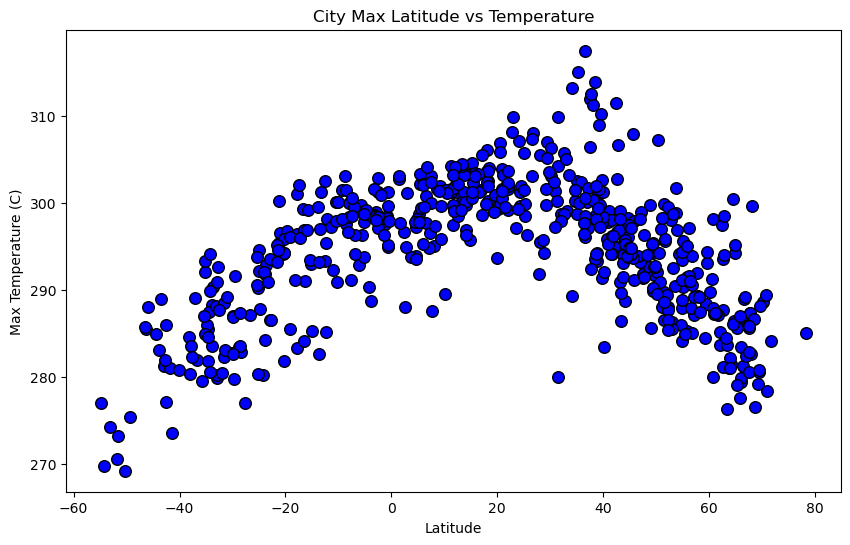

In [26]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker='o',edgecolors='black', color ='blue', s=[70])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title ("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

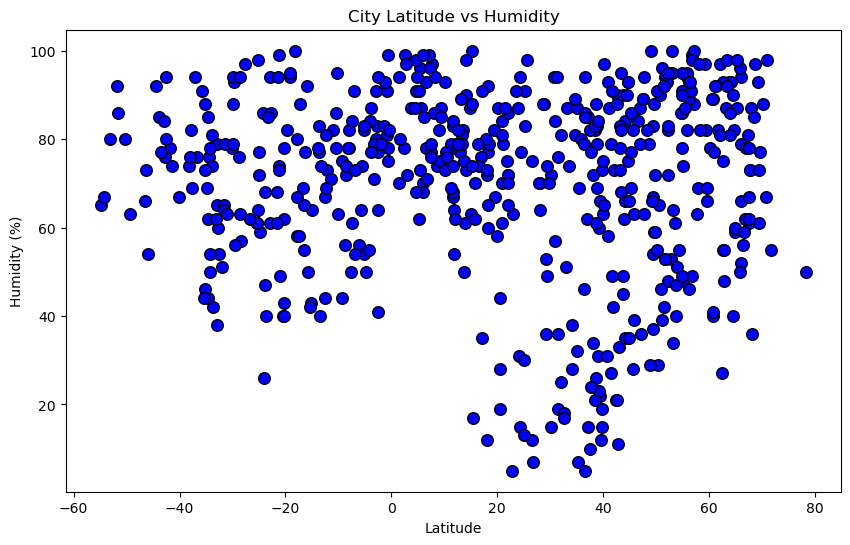

In [27]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker='o',edgecolors='black', color ='blue', s=[70])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title ("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\Manro\AppData\Local\Temp\ipykernel_31044\4056997372.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title ("City Latitude vs Cloudiness"+ "(" + str(pd.datetime.now().date()) + ")")


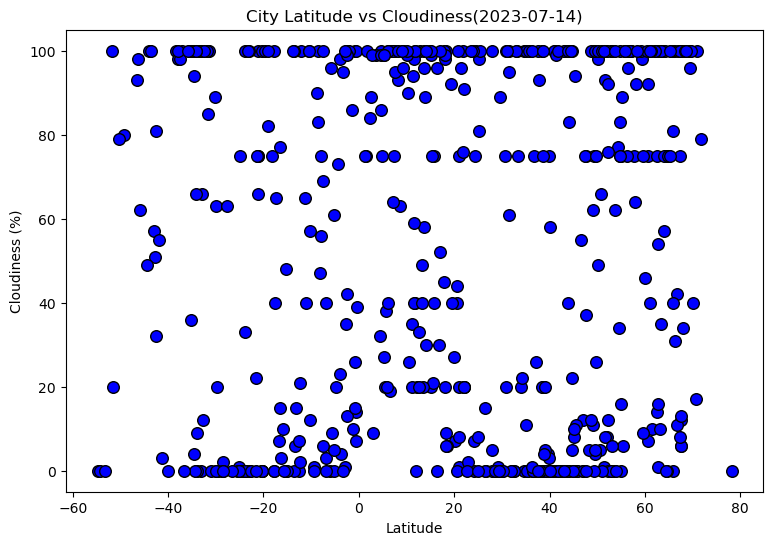

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker='o',edgecolors='black', color ='blue', s=[70])

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title ("City Latitude vs Cloudiness"+ "(" + str(pd.datetime.now().date()) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\Manro\AppData\Local\Temp\ipykernel_31044\4201854892.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title ("City Latitude vs Wind Speed"+ "(" + str(pd.datetime.now().date()) + ")")


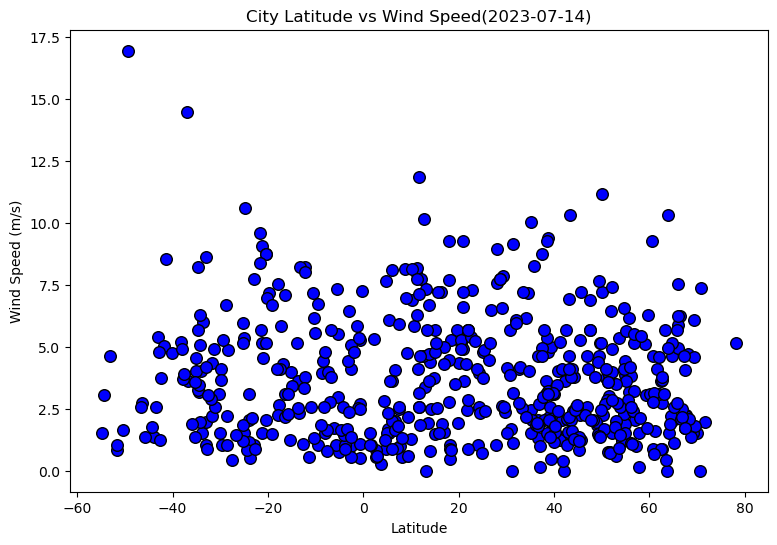

In [32]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker='o',edgecolors='black', color ='blue', s=[70])

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title ("City Latitude vs Wind Speed"+ "(" + str(pd.datetime.now().date()) + ")")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,284.11,55,79,1.96,RU,1689382979
3,westport,41.1415,-73.3579,299.02,87,100,2.06,US,1689382979
5,thompson,55.7435,-97.8558,285.24,94,100,6.17,CA,1689382739
7,bodaybo,57.8506,114.1933,289.29,69,64,0.16,RU,1689382980
8,djibo,14.1022,-1.6306,299.70,73,100,4.40,BF,1689382980


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,codrington,-38.2667,141.9667,284.61,74,100,5.20,AU,1689382979
2,bredasdorp,-34.5322,20.0403,285.50,62,4,3.16,ZA,1689382979
4,puerto ayora,-0.7393,-90.3518,298.46,91,26,2.68,EC,1689382932
6,uturoa,-16.7333,-151.4333,299.35,69,7,4.31,PF,1689382980
10,avarua,-21.2078,-159.7750,300.18,74,75,1.54,CK,1689382980


###  Temperature vs. Latitude Linear Regression Plot

y = -0.24x +305.21
The r-value is: 0.4123747865142281


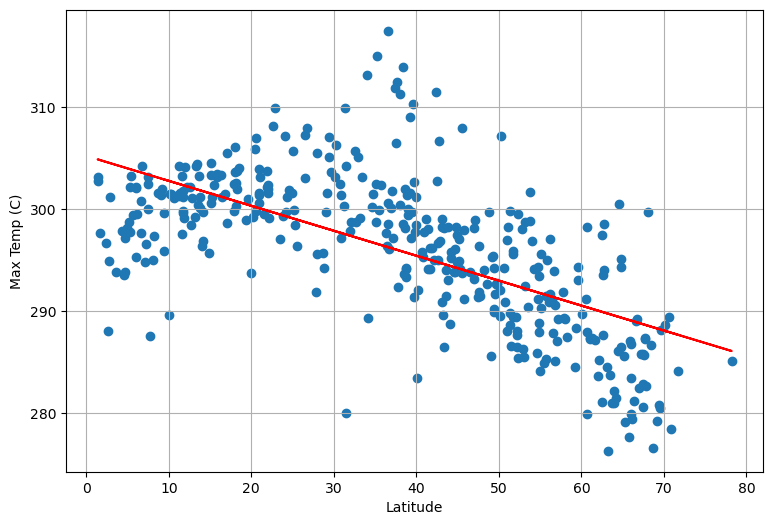

In [77]:
# Linear regression on Northern Hemisphere

plt.figure (figsize =(9,6))
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# YOUR CODE HERE

y = 0.44x +300.39
The r-value is: 0.6454856605396007


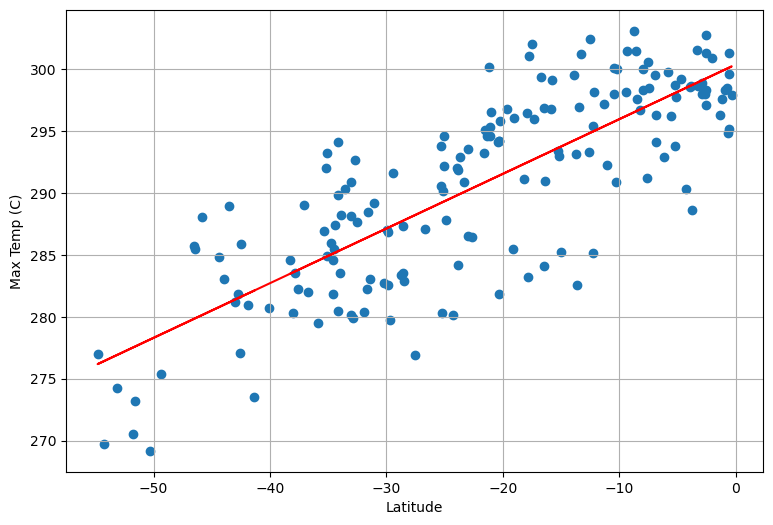

In [76]:
# Linear regression on Southern Hemisphere

plt.figure (figsize =(9,6))
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature in the Northern Hemisphere, the farther north a city is from the equator, the lower its max temperature. There is a strong positive correlation between latitude and max temperature in the Southern Hemisphere - the closer a city is to the equator, the higher the max temperature is. 

### Humidity vs. Latitude Linear Regression Plot

y = -0.03x +70.84
The r-value is: 0.0007966574850653006


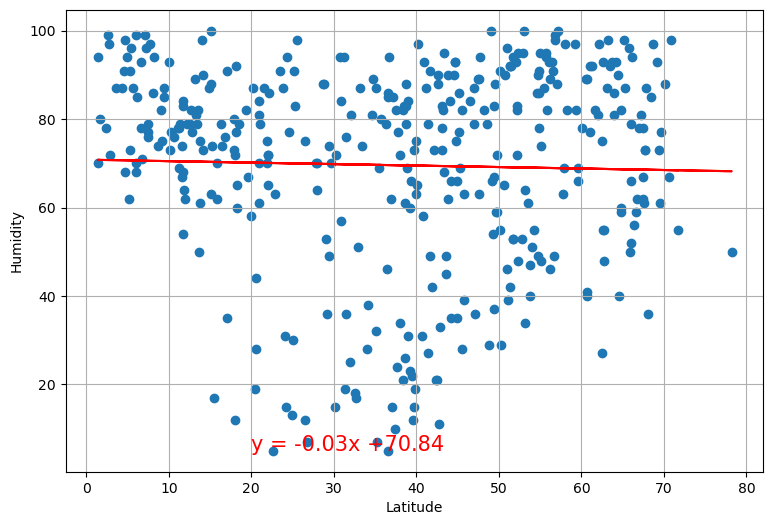

In [75]:
# Northern Hemisphere

plt.figure (figsize =(9,6))
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# YOUR CODE HERE

y = 0.03x +72.37
The r-value is: 0.0009810276777075396


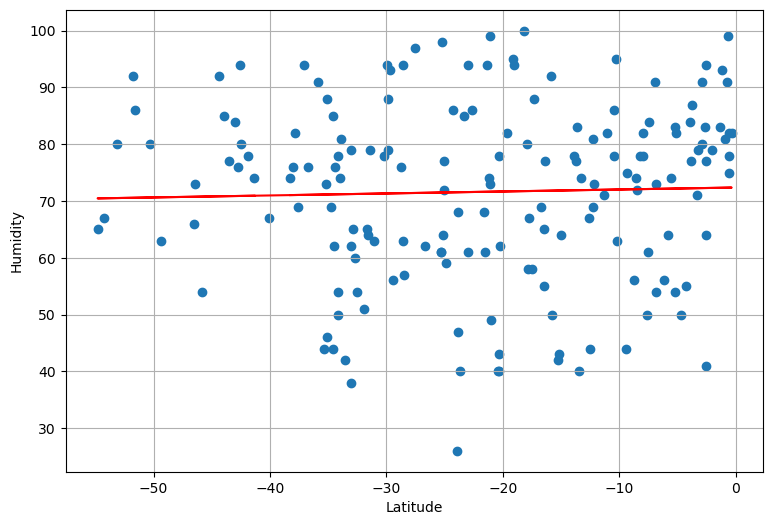

In [74]:
# Southern Hemisphere
# YOUR CODE HERE

plt.figure (figsize =(9,6))
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between the humidity levels and a city location in the Southern and Northern Hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.09x +55.83
The r-value is: 0.0017615355326534583


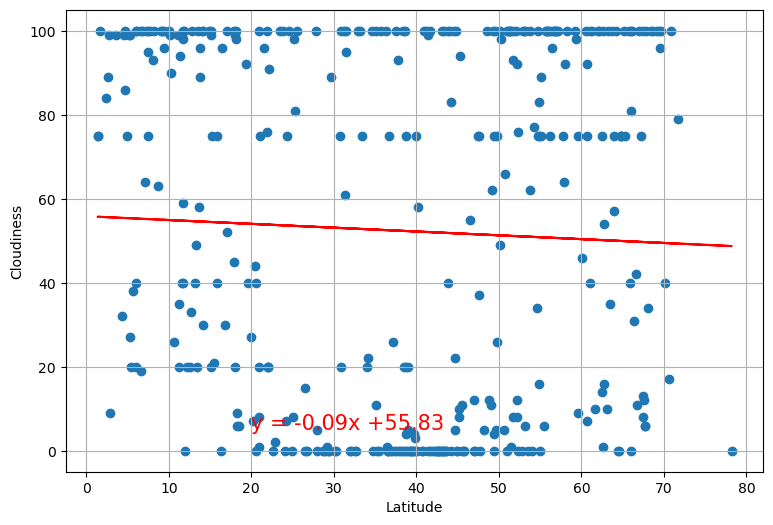

In [73]:
# Northern Hemisphere
# YOUR CODE HERE

plt.figure (figsize =(9,6))
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.34x +39.83
The r-value is: 0.012779938258441505


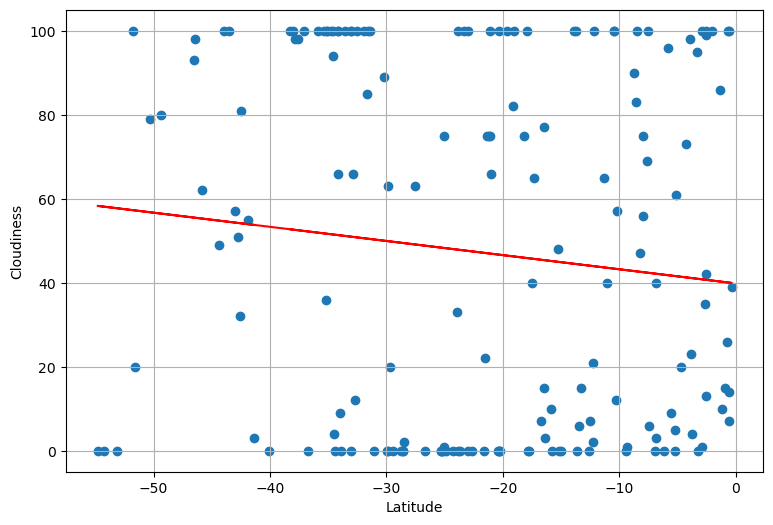

In [72]:
# Southern Hemisphere
# YOUR CODE HERE

plt.figure (figsize =(9,6))
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no correlation between Cloudiness levels and the latitude in Northern or Southern Hemispheres. Cloudiness levels do not seem to be dependent on latitude in either Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x +4.06
The r-value is: 0.010140401014593764


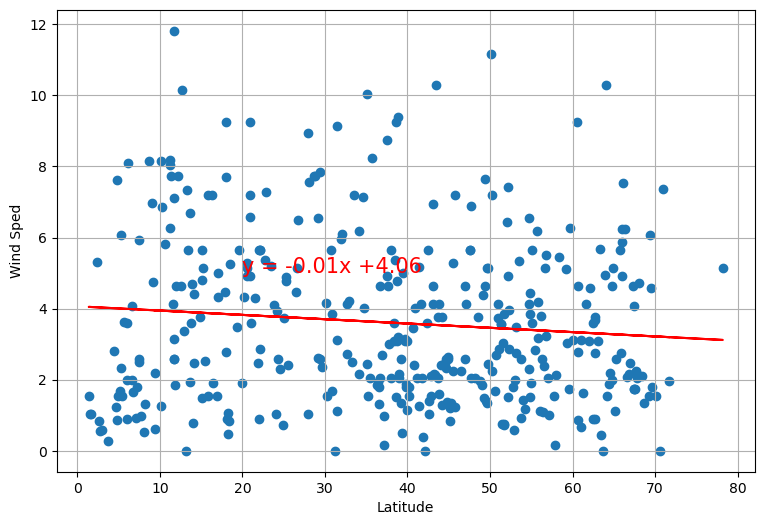

In [71]:
# Northern Hemisphere
# YOUR CODE HERE

plt.figure (figsize =(9,6))
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Sped')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.01x +3.53
The r-value is: 0.004939570117620966


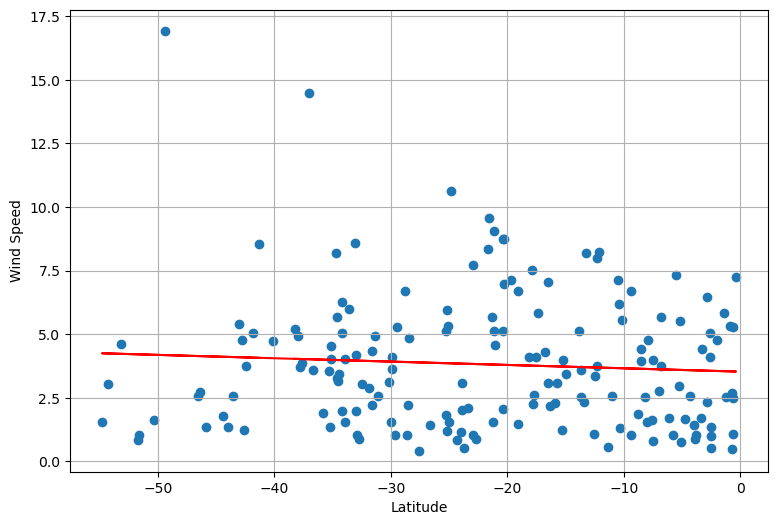

In [70]:
# Southern Hemisphere
# YOUR CODE HERE

plt.figure (figsize =(9,6))
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.grid(True)


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is very low negative correlations between Wind Speed and Latitude in both Northern and Southern Hemispheres. 